In [169]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [170]:
url='https://raw.githubusercontent.com/rylp/data_sets/master/loan_pred_data/train_ctrUa4K.csv'
df_train=pd.read_csv(url)
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [171]:
url='https://raw.githubusercontent.com/rylp/data_sets/master/loan_pred_data/test_lAUu6dG.csv'
df_test=pd.read_csv(url)
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [172]:
df_train.shape

(614, 13)

In [173]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [174]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [176]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

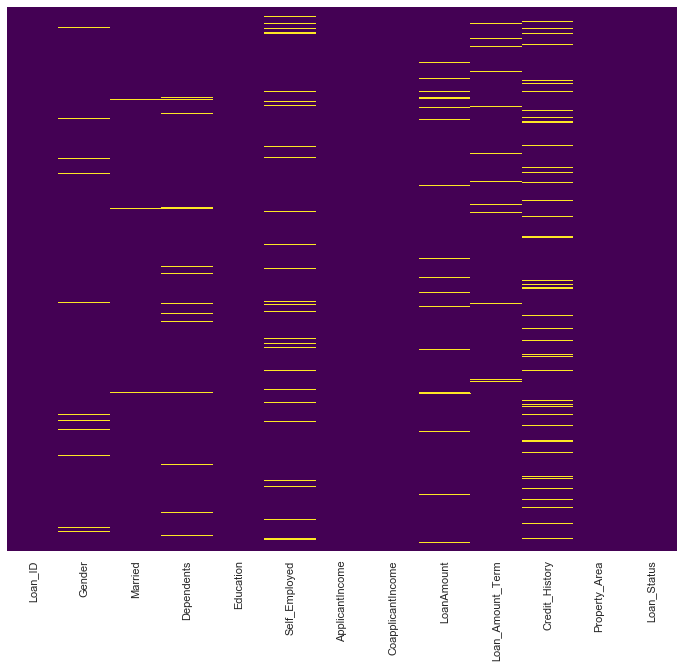

In [177]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

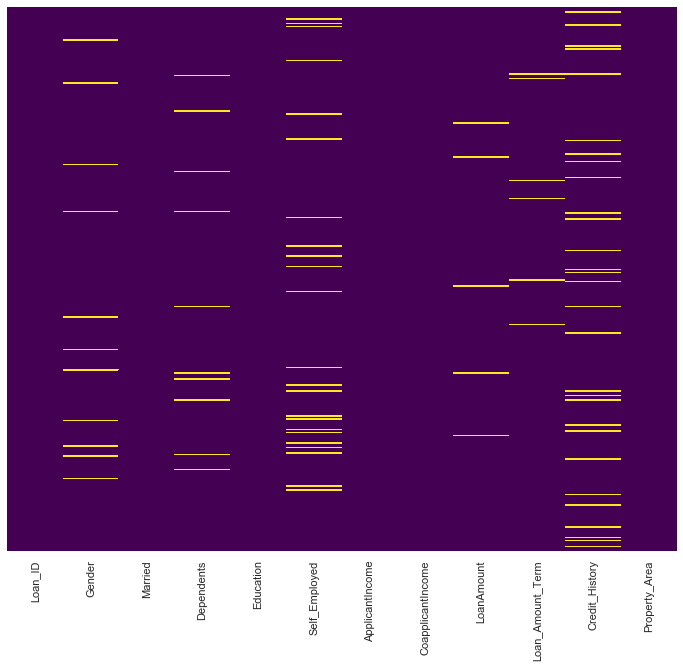

In [178]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

In [179]:
#Cleaning up gender
df_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [180]:
df_test['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [181]:
df_train['Gender'] = df_train['Gender'].map({'Male':'M', 'Female':'F'})
df_test['Gender'] = df_test['Gender'].map({'Male':'M', 'Female':'F'})

In [182]:
df_train['Gender'].dropna().value_counts()

M    489
F    112
Name: Gender, dtype: int64

In [183]:
df_test['Gender'].dropna().value_counts()

M    286
F     70
Name: Gender, dtype: int64

In [184]:
corr = df_train.corr().round(2)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.06,-0.00
LoanAmount,0.57,0.19,1.00,0.04,-0.01
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,0.00
Credit_History,-0.01,-0.00,-0.01,0.00,1.00


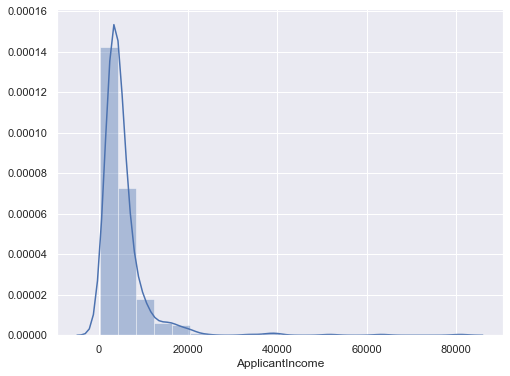

In [185]:
plt.figure(figsize=(8,6))
sns.distplot(df_train['ApplicantIncome'].dropna(), bins=20)

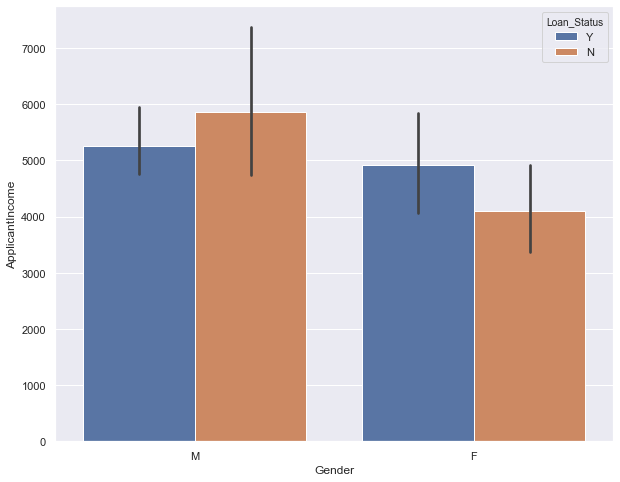

In [186]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_train['Gender'].dropna() , y=df_train['ApplicantIncome'], hue=df_train['Loan_Status'])
plt.show()

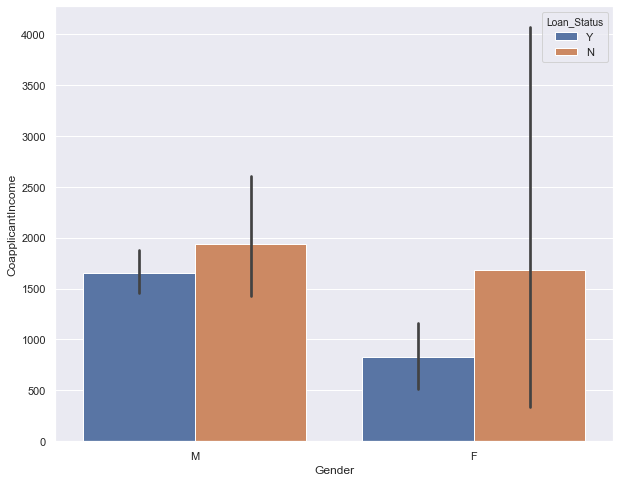

In [187]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_train['Gender'].dropna() , y=df_train['CoapplicantIncome'], hue=df_train['Loan_Status'])
plt.show()

In [188]:
#Inference-
#1.More the applicant income , more the chances of acceptance 
#2.More the co-applicant income more chances of rejection , lesser among females tho

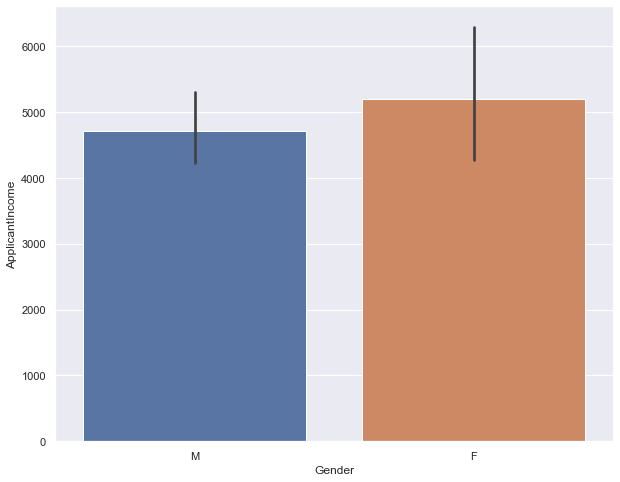

In [189]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_train['Gender'].dropna() , y=df_test['ApplicantIncome'])
plt.show()

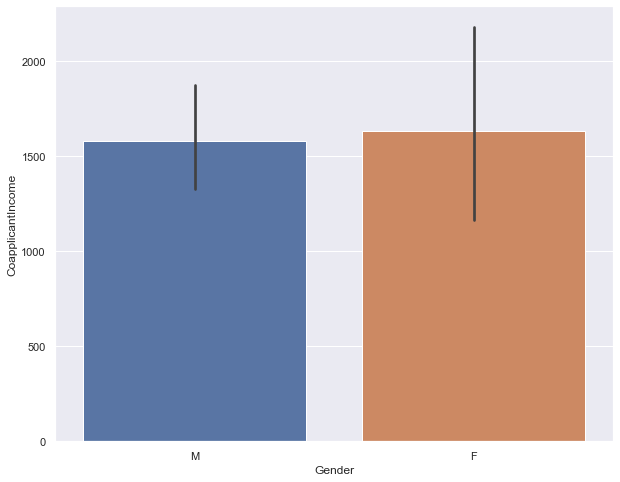

In [190]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_train['Gender'].dropna() , y=df_test['CoapplicantIncome'])
plt.show()

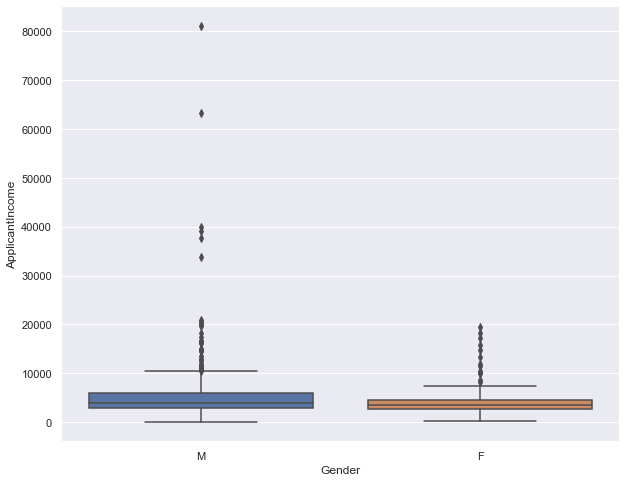

In [191]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_train['Gender'].dropna(), y=df_train['ApplicantIncome'])

In [192]:
#Inference- Applicant incomes above 20K indicate male 

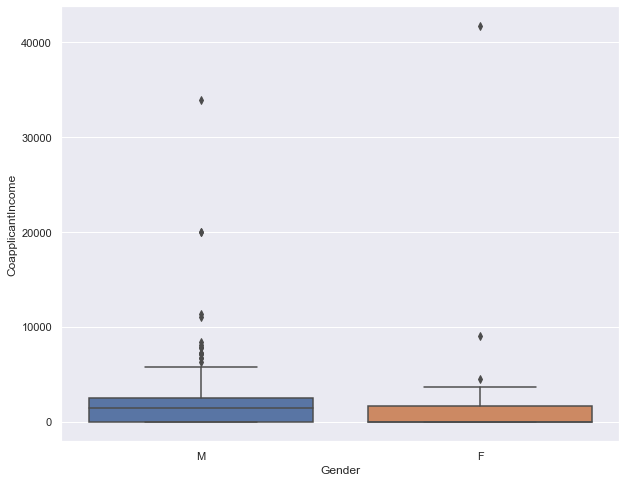

In [193]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_train['Gender'].dropna(), y=df_train['CoapplicantIncome'].dropna())

In [194]:
df_train[df_train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [195]:
df_train['Married'].dropna().value_counts()

Yes    398
No     213
Name: Married, dtype: int64

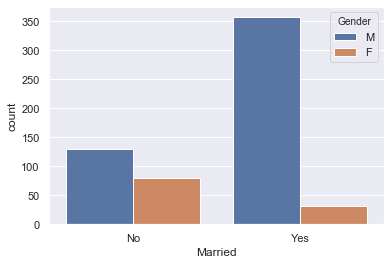

In [196]:
sns.countplot(x=df_train['Married'].dropna(), hue=df_train['Gender'])

In [197]:
#Inference- If married, more probable to be a man

In [198]:
df_train['Dependents'].dropna().value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

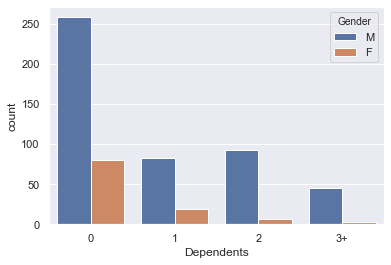

In [199]:
sns.countplot(x=df_train['Dependents'].dropna(), hue=df_train['Gender'])

In [200]:
#Inference - If depenedents are 3+ , 2, 1 huge chances of male

In [201]:
df_train['Property_Area'].dropna().value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

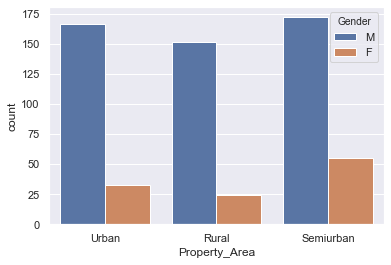

In [202]:
sns.countplot(x=df_train['Property_Area'], hue=df_train['Gender'])

In [203]:
df_train['Education'].dropna().value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [204]:
df_train['Self_Employed'].dropna().value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

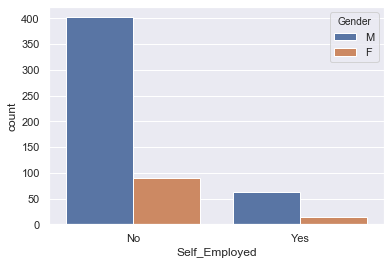

In [205]:
sns.countplot(x=df_train['Self_Employed'], hue=df_train['Gender'])

In [206]:
#Inference for below function
#1. if dependent are 3+ or 2 or 1 => assign Male
#2. if income is greater than 20000 => assign Male

In [207]:
def assign_gender(cols):
  gender=cols[0]
  income=cols[1]
  depend = cols[2]
  marriage = cols[3]

  if pd.isnull(gender):

    if income > 16000:
      gender='M'
      return gender

    else:
      if pd.notnull(depend):
        if depend == '3+':
          gender='M'
          return gender

        elif depend=='2':
          gender='M'
          return gender

        else:
          if depend=='1':
            gender='M'
            return gender

          elif marriage == 'Yes':
            gender='M'
            return gender
          
          else:
            gender='F'
            return gender

      else:
        if marriage=='Yes':
           gender='M'
           return gender

        else:
          gender='F'
          return gender

  else:
    return gender


In [208]:
df_train['Gender'] = df_train[['Gender','ApplicantIncome','Dependents','Married']].apply(assign_gender,axis=1)

In [209]:
df_test['Gender'] = df_test[['Gender','ApplicantIncome','Dependents','Married']].apply(assign_gender,axis=1)

In [210]:
df_train.iloc[[23,126,171,188,314,334,460,467,477,507,576,588,592],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,M,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,M,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,M,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,M,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,M,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,M,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,M,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,M,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,M,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,F,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


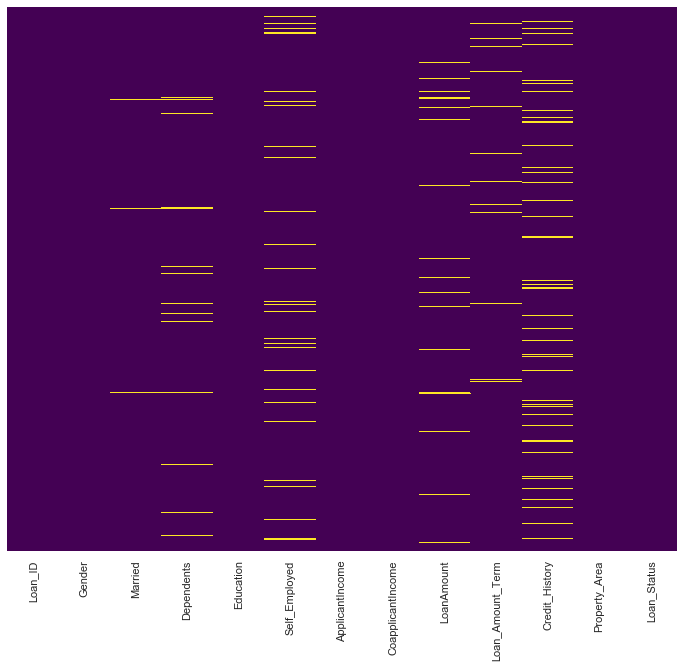

In [211]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

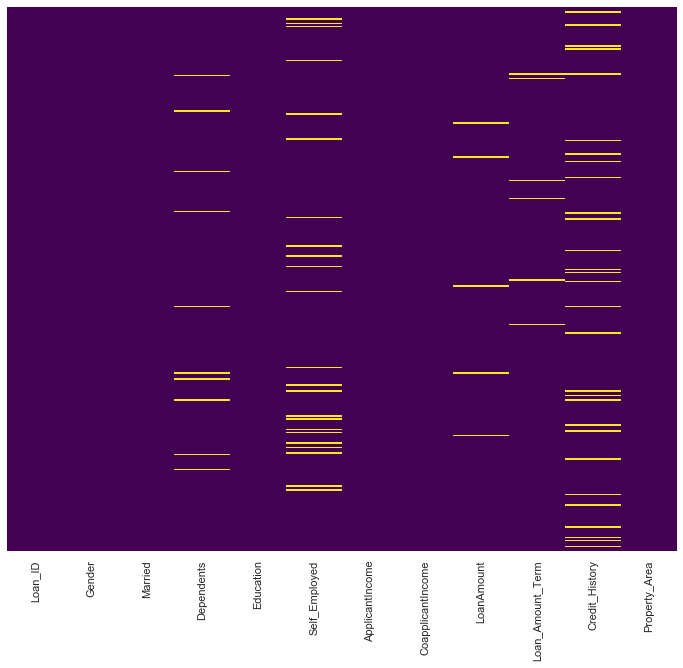

In [212]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

In [213]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [214]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Gender                0
Loan_ID               0
dtype: int64

In [215]:
#Cleaning credit history
df_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [216]:
df_train['Credit_History'] = df_train['Credit_History'].dropna().astype(int)

In [217]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

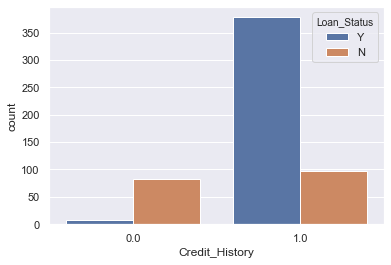

In [218]:
sns.countplot(x=df_train['Credit_History'].dropna(), hue=df_train['Loan_Status'])

In [219]:
#Inference- if you have credit_history 0, you have less chances of getting the loan

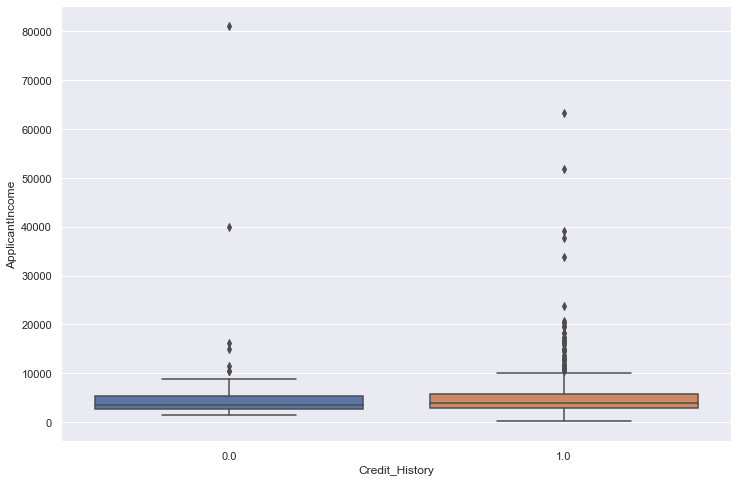

In [220]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_train['Credit_History'].dropna(), y=df_train['ApplicantIncome'])

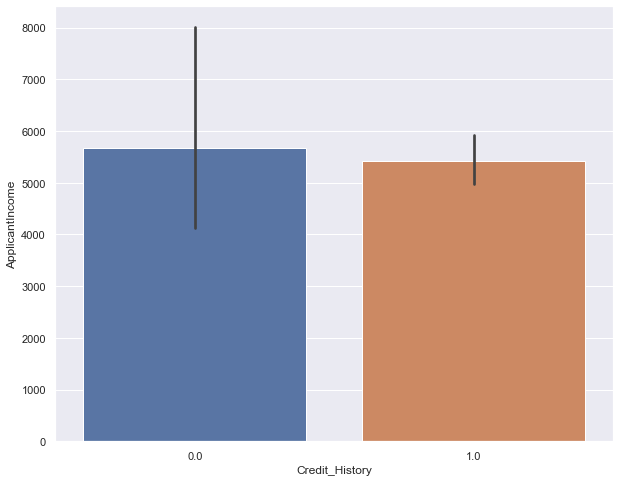

In [221]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_train['Credit_History'], y=df_train['ApplicantIncome'])

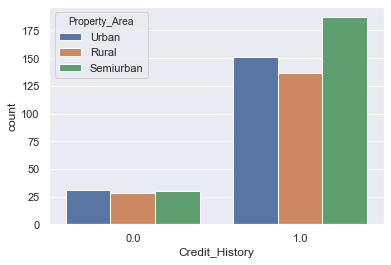

In [222]:
sns.countplot(x=df_train['Credit_History'].dropna(), hue=df_train['Property_Area'])
#So, no inference from this 

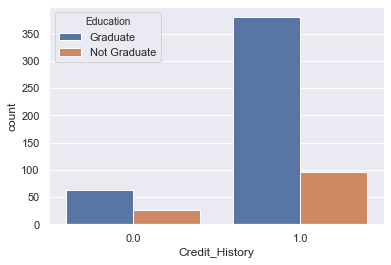

In [223]:
sns.countplot(x=df_train['Credit_History'].dropna(), hue=df_train['Education'])
#So, ppl with credit history tend to be Graduates

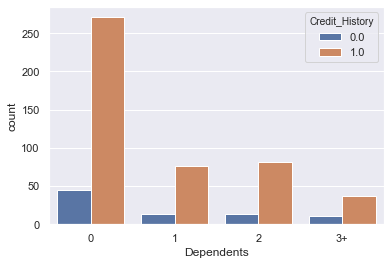

In [224]:
sns.countplot(x=df_train['Dependents'].dropna(), hue=df_train['Credit_History'])
#if dependents are 3+, credit history tends to be 1

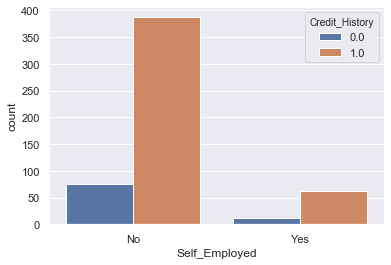

In [225]:
sns.countplot(x=df_train['Self_Employed'].dropna(), hue=df_train['Credit_History'])
#If self-employed very less chances of credit history 0

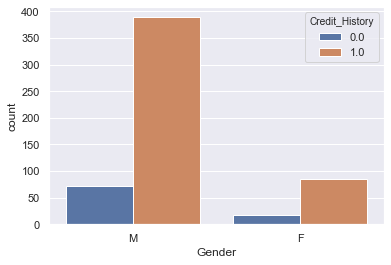

In [226]:
sns.countplot(x=df_train['Gender'].dropna(), hue=df_train['Credit_History'])
#If it is a female, credit history is very unlikely to be 0

In [227]:
df_train['Credit_History'].mean()

0.8421985815602837

In [228]:
filt = df_train['Credit_History'].isnull()
df_train[filt]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,M,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,M,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,M,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,M,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,M,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,M,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,M,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,M,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,M,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,F,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [229]:
zero_cre_his = df_train['Credit_History'] == 0 
df_train.loc[zero_cre_his]['CoapplicantIncome'].mean()

1542.1797752808989

In [230]:
one_cre_his = df_train['Credit_History'] == 1 
df_train.loc[one_cre_his]['CoapplicantIncome'].mean()

1528.250357870821

In [231]:
df_train['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [232]:
filt = df_train['CoapplicantIncome']==0
zero_coapp_inc = df_train[filt]

In [233]:
zero_coapp_inc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,M,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,M,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,F,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,F,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,M,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,M,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [234]:
zero_coapp_inc['Credit_History'].value_counts()
#if co applicant income is zero, tends to be a 1.0 credit

1.0    213
0.0     41
Name: Credit_History, dtype: int64

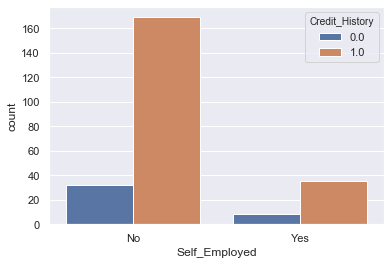

In [235]:
sns.countplot(x=zero_coapp_inc['Self_Employed'], hue=zero_coapp_inc['Credit_History'])

In [236]:
df_train['Credit_History'].dropna().mean()

0.8421985815602837

In [237]:
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [238]:
#As 84% people have credit history 1 making it 1.0 for all remainingvalues
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Credit_History'].head(20)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    0.0
18    1.0
19    1.0
Name: Credit_History, dtype: float64

In [239]:
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)
df_test['Credit_History'].isnull().sum()

0

In [240]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [241]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,M,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,M,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,M,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,M,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,M,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,M,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,M,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [242]:
#Self Employed 
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [243]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

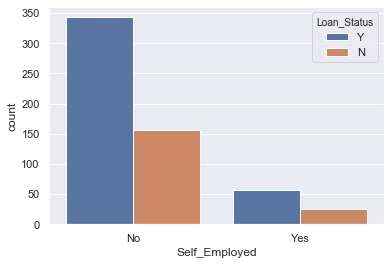

In [244]:
sns.countplot(x=df_train['Self_Employed'], hue=df_train['Loan_Status'])

In [245]:
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes':0, 'No':1})

In [246]:
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes':0, 'No':1})

In [247]:
df_train['Self_Employed']

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Self_Employed, Length: 614, dtype: float64

In [248]:
df_train['Self_Employed'].dropna().mean()

0.8591065292096219

In [249]:
df_train['Self_Employed'].dropna().mode()

0    1.0
dtype: float64

In [250]:
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)

In [251]:
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

In [252]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [253]:
df_train['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [254]:
mean_loan_amt = df_train['LoanAmount'].dropna().mean()
mean_loan_amt

146.41216216216216

In [255]:
mean_loan_amt_test = df_test['LoanAmount'].dropna().mean()
mean_loan_amt_test

136.13259668508286

In [256]:
df_train['LoanAmount'].fillna(mean_loan_amt,inplace=True)

In [257]:
df_test['LoanAmount'].fillna(mean_loan_amt_test,inplace=True)

In [258]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [259]:
df_test[df_test['LoanAmount'] == 136.13259668508286]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,M,Yes,1,Graduate,1.0,3413,4053,136.132597,360.0,1.0,Semiurban
101,LP001542,F,Yes,0,Graduate,1.0,2262,0,136.132597,480.0,0.0,Semiurban
188,LP002057,M,Yes,0,Not Graduate,1.0,13083,0,136.132597,360.0,1.0,Rural
247,LP002360,M,Yes,NaN,Graduate,1.0,10000,0,136.132597,360.0,1.0,Urban
289,LP002593,M,Yes,1,Graduate,1.0,8333,4000,136.132597,360.0,1.0,Urban


In [260]:
df_train['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [261]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [262]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [263]:
mean_loan_amt_term = df_train['Loan_Amount_Term'].dropna().mean()
mean_loan_amt_term

342.0

In [264]:
mean_loan_amt_term_test = df_test['Loan_Amount_Term'].dropna().mean()
mean_loan_amt_term_test

342.53739612188366

In [265]:
df_train['Loan_Amount_Term'].fillna(mean_loan_amt_term,inplace=True)

In [266]:
df_test['Loan_Amount_Term'].fillna(mean_loan_amt_term_test,inplace=True)

In [267]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [268]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [269]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

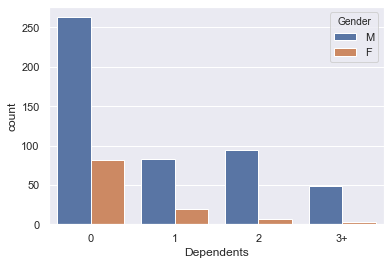

In [270]:
sns.countplot(x=df_train['Dependents'], hue=df_train['Gender'])

In [271]:
df_train['Dependents'] = df_train['Dependents'].replace('3+',3)

In [272]:
df_train['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [273]:
df_train['Dependents']  = df_train['Dependents'].map({3:1,'2':2,'1':3,'0':4})

In [274]:
df_test['Dependents']  = df_test['Dependents'].map({3:1,'2':2,'1':3,'0':4})

In [275]:
df_train['Dependents'].value_counts()

4.0    345
3.0    102
2.0    101
1.0     51
Name: Dependents, dtype: int64

In [276]:
mean_dep = df_train['Dependents'].dropna().mean()
mean_dep

3.2370617696160267

In [277]:
df_train['Dependents'].fillna(mean_dep,inplace=True)

In [278]:
mean_dep_test = df_test['Dependents'].dropna().mean()
mean_dep_test

3.444794952681388

In [279]:
df_test['Dependents'].fillna(mean_dep_test,inplace=True)

In [280]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [281]:
df_train.shape

(614, 13)

In [282]:
df_train = df_train.dropna()

In [283]:
df_train.shape

(611, 13)

In [284]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,4.0,Graduate,1.0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,M,Yes,3.0,Graduate,1.0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,M,Yes,4.0,Graduate,0.0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,M,Yes,4.0,Not Graduate,1.0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,M,No,4.0,Graduate,1.0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,F,No,4.0,Graduate,1.0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,M,Yes,1.0,Graduate,1.0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,M,Yes,3.0,Graduate,1.0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,M,Yes,2.0,Graduate,1.0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [285]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [286]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,M,Yes,4.000000,Graduate,1.0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,M,Yes,3.000000,Graduate,1.0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,M,Yes,2.000000,Graduate,1.0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,M,Yes,2.000000,Graduate,1.0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,M,No,4.000000,Not Graduate,1.0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,M,Yes,3.444795,Not Graduate,0.0,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,M,Yes,4.000000,Graduate,1.0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,M,No,4.000000,Graduate,1.0,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,M,Yes,4.000000,Graduate,1.0,5000,2393,158.0,360.0,1.0,Rural


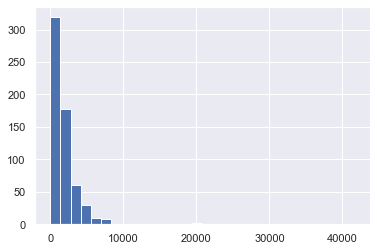

In [287]:
#mapping
plt.hist(df_train['CoapplicantIncome'], bins=30)
plt.show()

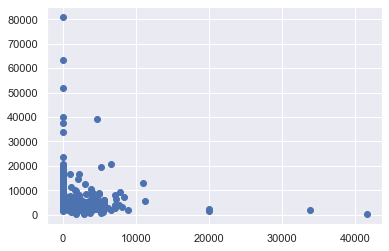

In [288]:
plt.scatter(df_train['CoapplicantIncome'], df_train['ApplicantIncome'])

In [289]:
#NOT DOING THIS IN THIS ANALYSIS. KEEPING CoapplicantIncome as it is
# make 2 seperate groups/markers for Coapplicant income
# 1. all those with coapplicant income 0 
# 2. all those with coapplicant income more than 0 
# n then analyse n then map

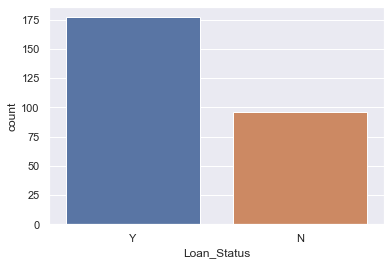

In [290]:
sns.countplot(x=zero_coapp_inc['Loan_Status'])

In [291]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,4.0,Graduate,1.0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,M,Yes,3.0,Graduate,1.0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,M,Yes,4.0,Graduate,0.0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,M,Yes,4.0,Not Graduate,1.0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,M,No,4.0,Graduate,1.0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,F,No,4.0,Graduate,1.0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,M,Yes,1.0,Graduate,1.0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,M,Yes,3.0,Graduate,1.0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,M,Yes,2.0,Graduate,1.0,7583,0.0,187.000000,360.0,1.0,Urban,Y


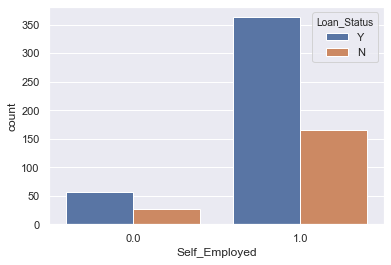

In [292]:
sns.countplot(x=df_train['Self_Employed'], hue=df_train['Loan_Status'])

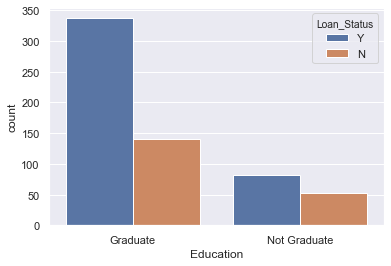

In [293]:
sns.countplot(x=df_train['Education'], hue=df_train['Loan_Status'])

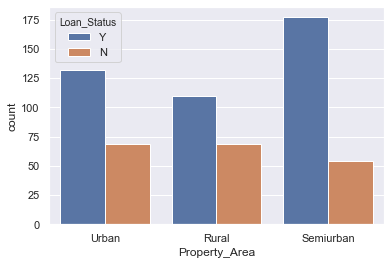

In [294]:
sns.countplot(x=df_train['Property_Area'], hue=df_train['Loan_Status'])

In [295]:
#Rural -> 3
#Urban -> 2
#Semiurban -> 1

In [296]:
df_train['Property_Area'] = df_train['Property_Area'].map({'Rural':3,'Urban':2,'Semiurban':1})

In [297]:
df_test['Property_Area'] = df_test['Property_Area'].map({'Rural':3,'Urban':2,'Semiurban':1})

In [298]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,M,Yes,4.000000,Graduate,1.0,5720,0,110.0,360.0,1.0,2
1,LP001022,M,Yes,3.000000,Graduate,1.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,M,Yes,2.000000,Graduate,1.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,M,Yes,2.000000,Graduate,1.0,2340,2546,100.0,360.0,1.0,2
4,LP001051,M,No,4.000000,Not Graduate,1.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,M,Yes,3.444795,Not Graduate,0.0,4009,1777,113.0,360.0,1.0,2
363,LP002975,M,Yes,4.000000,Graduate,1.0,4158,709,115.0,360.0,1.0,2
364,LP002980,M,No,4.000000,Graduate,1.0,3250,1993,126.0,360.0,1.0,1
365,LP002986,M,Yes,4.000000,Graduate,1.0,5000,2393,158.0,360.0,1.0,3


In [299]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,4.0,Graduate,1.0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,M,Yes,3.0,Graduate,1.0,4583,1508.0,128.000000,360.0,1.0,3,N
2,LP001005,M,Yes,4.0,Graduate,0.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,M,Yes,4.0,Not Graduate,1.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,M,No,4.0,Graduate,1.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,F,No,4.0,Graduate,1.0,2900,0.0,71.000000,360.0,1.0,3,Y
610,LP002979,M,Yes,1.0,Graduate,1.0,4106,0.0,40.000000,180.0,1.0,3,Y
611,LP002983,M,Yes,3.0,Graduate,1.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,M,Yes,2.0,Graduate,1.0,7583,0.0,187.000000,360.0,1.0,2,Y


In [300]:
gender = pd.get_dummies(df_train['Gender'],drop_first=True)
gender

,M
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [301]:
gender_test = pd.get_dummies(df_test['Gender'],drop_first=True)
gender_test

,M
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [302]:
married = pd.get_dummies(df_train['Married'],drop_first=True)
married

,Yes
0,0
1,1
2,1
3,1
4,0
...,...
609,0
610,1
611,1
612,1


In [303]:
married_test = pd.get_dummies(df_test['Married'],drop_first=True)
married_test

,Yes
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,0
365,1


In [304]:
education = pd.get_dummies(df_train['Education'],drop_first=True)
education

,Not Graduate
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [305]:
education_test = pd.get_dummies(df_test['Education'],drop_first=True)
education_test

,Not Graduate
0,0
1,0
2,0
3,0
4,1
...,...
362,1
363,0
364,0
365,0


In [306]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1,'N':0})

In [307]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,M,No,4.0,Graduate,1.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,M,Yes,3.0,Graduate,1.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,M,Yes,4.0,Graduate,0.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,M,Yes,4.0,Not Graduate,1.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,M,No,4.0,Graduate,1.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,F,No,4.0,Graduate,1.0,2900,0.0,71.000000,360.0,1.0,3,1
610,LP002979,M,Yes,1.0,Graduate,1.0,4106,0.0,40.000000,180.0,1.0,3,1
611,LP002983,M,Yes,3.0,Graduate,1.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,M,Yes,2.0,Graduate,1.0,7583,0.0,187.000000,360.0,1.0,2,1


In [308]:
df_train = pd.concat([df_train,gender,married,education],axis=1)

In [309]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,M,Yes,Not Graduate
0,LP001002,M,No,4.0,Graduate,1.0,5849,0.0,146.412162,360.0,1.0,2,1,1,0,0
1,LP001003,M,Yes,3.0,Graduate,1.0,4583,1508.0,128.000000,360.0,1.0,3,0,1,1,0
2,LP001005,M,Yes,4.0,Graduate,0.0,3000,0.0,66.000000,360.0,1.0,2,1,1,1,0
3,LP001006,M,Yes,4.0,Not Graduate,1.0,2583,2358.0,120.000000,360.0,1.0,2,1,1,1,1
4,LP001008,M,No,4.0,Graduate,1.0,6000,0.0,141.000000,360.0,1.0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,F,No,4.0,Graduate,1.0,2900,0.0,71.000000,360.0,1.0,3,1,0,0,0
610,LP002979,M,Yes,1.0,Graduate,1.0,4106,0.0,40.000000,180.0,1.0,3,1,1,1,0
611,LP002983,M,Yes,3.0,Graduate,1.0,8072,240.0,253.000000,360.0,1.0,2,1,1,1,0
612,LP002984,M,Yes,2.0,Graduate,1.0,7583,0.0,187.000000,360.0,1.0,2,1,1,1,0


In [310]:
df_test = pd.concat([df_test,gender_test,married_test,education_test],axis=1)

In [311]:
df_train.drop(['Loan_ID','Gender','Married','Dependents','Education'],axis=1,inplace=True)

In [312]:
df_train

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,M,Yes,Not Graduate
0,1.0,5849,0.0,146.412162,360.0,1.0,2,1,1,0,0
1,1.0,4583,1508.0,128.000000,360.0,1.0,3,0,1,1,0
2,0.0,3000,0.0,66.000000,360.0,1.0,2,1,1,1,0
3,1.0,2583,2358.0,120.000000,360.0,1.0,2,1,1,1,1
4,1.0,6000,0.0,141.000000,360.0,1.0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,2900,0.0,71.000000,360.0,1.0,3,1,0,0,0
610,1.0,4106,0.0,40.000000,180.0,1.0,3,1,1,1,0
611,1.0,8072,240.0,253.000000,360.0,1.0,2,1,1,1,0
612,1.0,7583,0.0,187.000000,360.0,1.0,2,1,1,1,0


In [313]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,M,Yes,Not Graduate
0,LP001015,M,Yes,4.000000,Graduate,1.0,5720,0,110.0,360.0,1.0,2,1,1,0
1,LP001022,M,Yes,3.000000,Graduate,1.0,3076,1500,126.0,360.0,1.0,2,1,1,0
2,LP001031,M,Yes,2.000000,Graduate,1.0,5000,1800,208.0,360.0,1.0,2,1,1,0
3,LP001035,M,Yes,2.000000,Graduate,1.0,2340,2546,100.0,360.0,1.0,2,1,1,0
4,LP001051,M,No,4.000000,Not Graduate,1.0,3276,0,78.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,M,Yes,3.444795,Not Graduate,0.0,4009,1777,113.0,360.0,1.0,2,1,1,1
363,LP002975,M,Yes,4.000000,Graduate,1.0,4158,709,115.0,360.0,1.0,2,1,1,0
364,LP002980,M,No,4.000000,Graduate,1.0,3250,1993,126.0,360.0,1.0,1,1,0,0
365,LP002986,M,Yes,4.000000,Graduate,1.0,5000,2393,158.0,360.0,1.0,3,1,1,0


In [314]:
loan_ids = df_test.iloc[:,0]
loan_ids

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [315]:
df_test.drop(['Loan_ID','Gender','Married','Dependents','Education'],axis=1,inplace=True)

In [316]:
df_test

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,M,Yes,Not Graduate
0,1.0,5720,0,110.0,360.0,1.0,2,1,1,0
1,1.0,3076,1500,126.0,360.0,1.0,2,1,1,0
2,1.0,5000,1800,208.0,360.0,1.0,2,1,1,0
3,1.0,2340,2546,100.0,360.0,1.0,2,1,1,0
4,1.0,3276,0,78.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
362,0.0,4009,1777,113.0,360.0,1.0,2,1,1,1
363,1.0,4158,709,115.0,360.0,1.0,2,1,1,0
364,1.0,3250,1993,126.0,360.0,1.0,1,1,0,0
365,1.0,5000,2393,158.0,360.0,1.0,3,1,1,0


In [317]:
x_tes = df_test.iloc[:,:]
x_tes

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,M,Yes,Not Graduate
0,1.0,5720,0,110.0,360.0,1.0,2,1,1,0
1,1.0,3076,1500,126.0,360.0,1.0,2,1,1,0
2,1.0,5000,1800,208.0,360.0,1.0,2,1,1,0
3,1.0,2340,2546,100.0,360.0,1.0,2,1,1,0
4,1.0,3276,0,78.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
362,0.0,4009,1777,113.0,360.0,1.0,2,1,1,1
363,1.0,4158,709,115.0,360.0,1.0,2,1,1,0
364,1.0,3250,1993,126.0,360.0,1.0,1,1,0,0
365,1.0,5000,2393,158.0,360.0,1.0,3,1,1,0


In [318]:
y=df_train['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 611, dtype: int64

In [319]:
df_train.drop(['Loan_Status'],axis=1,inplace=True)

In [320]:
df_train

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,M,Yes,Not Graduate
0,1.0,5849,0.0,146.412162,360.0,1.0,2,1,0,0
1,1.0,4583,1508.0,128.000000,360.0,1.0,3,1,1,0
2,0.0,3000,0.0,66.000000,360.0,1.0,2,1,1,0
3,1.0,2583,2358.0,120.000000,360.0,1.0,2,1,1,1
4,1.0,6000,0.0,141.000000,360.0,1.0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
609,1.0,2900,0.0,71.000000,360.0,1.0,3,0,0,0
610,1.0,4106,0.0,40.000000,180.0,1.0,3,1,1,0
611,1.0,8072,240.0,253.000000,360.0,1.0,2,1,1,0
612,1.0,7583,0.0,187.000000,360.0,1.0,2,1,1,0


In [321]:
x=df_train.iloc[:,:]

In [322]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [332]:
x = tf.keras.utils.normalize(x,axis=1)
x_tes = tf.keras.utils.normalize(x_tes,axis=1)

In [334]:
model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10,input_dim=10,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x,y,epochs=100)

Train on 611 samples
Epoch 1/100
611/611 [==============================] - 0s 213us/sample - loss: 0.6529 - acc: 0.6694
Epoch 2/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6298 - acc: 0.6858
Epoch 3/100
611/611 [==============================] - 0s 47us/sample - loss: 0.6245 - acc: 0.6858
Epoch 4/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6247 - acc: 0.6858
Epoch 5/100
611/611 [==============================] - 0s 42us/sample - loss: 0.6207 - acc: 0.6858
Epoch 6/100
611/611 [==============================] - 0s 46us/sample - loss: 0.6235 - acc: 0.6858
Epoch 7/100
611/611 [==============================] - 0s 46us/sample - loss: 0.6194 - acc: 0.6858
Epoch 8/100
611/611 [==============================] - 0s 47us/sample - loss: 0.6185 - acc: 0.6858
Epoch 9/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6187 - acc: 0.6858
Epoch 10/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6206 -

611/611 [==============================] - 0s 39us/sample - loss: 0.6131 - acc: 0.6743
Epoch 83/100
611/611 [==============================] - 0s 42us/sample - loss: 0.6075 - acc: 0.6874
Epoch 84/100
611/611 [==============================] - 0s 41us/sample - loss: 0.6050 - acc: 0.6858
Epoch 85/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6039 - acc: 0.6890
Epoch 86/100
611/611 [==============================] - 0s 44us/sample - loss: 0.6031 - acc: 0.6858
Epoch 87/100
611/611 [==============================] - 0s 39us/sample - loss: 0.6051 - acc: 0.6907
Epoch 88/100
611/611 [==============================] - 0s 43us/sample - loss: 0.6050 - acc: 0.6907
Epoch 89/100
611/611 [==============================] - 0s 41us/sample - loss: 0.6068 - acc: 0.6890
Epoch 90/100
611/611 [==============================] - 0s 42us/sample - loss: 0.6033 - acc: 0.6907
Epoch 91/100
611/611 [==============================] - 0s 40us/sample - loss: 0.6085 - acc: 0.6874
Epoch 92/100


In [884]:
model.save('basic_logreg.model')

In [885]:
new_model = tf.keras.models.load_model('basic_logreg.model')

In [886]:
predictions = new_model.predict([x_tes])

In [887]:
predictions

array([[8.62986743e-01],
       [9.95056987e-01],
       [9.62138653e-01],
       [1.00000000e+00],
       [6.78445876e-01],
       [9.97411549e-01],
       [6.37056112e-01],
       [3.53715457e-02],
       [8.27611268e-01],
       [1.00000000e+00],
       [6.88102782e-01],
       [9.97856915e-01],
       [9.37748671e-01],
       [4.79414552e-01],
       [8.67480874e-01],
       [8.78547072e-01],
       [9.33974028e-01],
       [9.24753785e-01],
       [9.01160479e-01],
       [9.99999523e-01],
       [1.00000000e+00],
       [9.25897658e-01],
       [7.55249798e-01],
       [7.21626461e-01],
       [7.79832602e-01],
       [6.34059774e-08],
       [8.37453067e-01],
       [7.28344917e-01],
       [7.84735620e-01],
       [8.92277122e-01],
       [9.69461501e-01],
       [8.95964921e-01],
       [8.98403406e-01],
       [1.00000000e+00],
       [9.99020696e-01],
       [1.41779169e-01],
       [9.35413420e-01],
       [1.00000000e+00],
       [8.66857946e-01],
       [7.93292344e-01],


In [888]:
print(predictions.shape)
print(type(predictions))

(367, 1)
<class 'numpy.ndarray'>


In [889]:
predictions = predictions.round()

In [890]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [891]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import metrics

In [892]:
#from sklearn import preprocessing
#x=preprocessing.scale(x)
#x_tes=preprocessing.scale(x_tes)

In [893]:
#from sklearn.svm import SVC

In [894]:
#svc_model = SVC()

In [895]:
#svc_model.fit(x,y)

In [896]:
#y_pred=svc_model.predict(x_tes)
#y_pred

In [897]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=63)

#print(x_train.shape)
#print(type(x_train))
#print(y_train.shape)
#print(type(y_train))
#print(x_test.shape)
#print(type(x_test))
#print(y_test.shape)
#print(type(y_test))

In [898]:
#logreg=LogisticRegression(max_iter=3000)

In [899]:
#logreg.fit(x,y)

In [900]:
#y_pred=logreg.predict(x_tes)
#y_pred

In [901]:
predicted = pd.DataFrame({'Loan_Status':predictions.flatten()})
predicted

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [902]:
predicted['Loan_Status']= predicted['Loan_Status'].map({1:'Y',0:'N'})
predicted

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [903]:
submit=pd.DataFrame({'Loan_ID':loan_ids, 'Loan_Status':predicted['Loan_Status']})
submit

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [905]:
submit.to_csv('submission10_basic_nn_tf.csv', index=False)